<a href="https://colab.research.google.com/github/thanadolch/data_viz/blob/main/visualization-final-exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import datetime
from datetime import time

In [23]:
path = '/content/drive/My Drive/DVZ'

##ดึงข้อมูล Data 63-64

In [24]:
Covid_19 = pd.read_excel(os.path.join(path,'passenger-covid19.xlsx'),sheet_name='Data63-64')
Covid_19.head()

,ขนคน/ขนสินค้า,โหมดการเดินทาง,รูปแบบการเดินทาง,สาธารณะ/ส่วนบุคคล,หน่วยงาน,ยานพาหนะ/ท่า,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ขนคน (คน),ทางบก,การเดินทางระหว่างจังหวัด,สาธารณะ,บขส.,รถ ขบส. และ รถร่วม,233330,252899.0,225731.0,216919.0,234611.0,153605.0,142318.0,138700.0,139202.0,155553.0,150419.0,156634.0,143982.0,138215.0,136102.0,143219.0,155363.0,154020.0,162852.0,151027.0,143574.0,142722.0,145672.0,161263.0,154822.0,166247.0,153945.0,144313.0,141870.0,142709.0,160689.0,155232.0,163819.0,151378.0,...,48763.0,62129.0,52073.0,58507.0,52521.0,49540.0,48797.0,52669.0,73143.0,66697.0,68272.0,58026.0,52905.0,46689.0,54445.0,70366.0,60124.0,69317.0,60306.0,58385.0,58906.0,71885.0,101077.0,101477.0,70140.0,60013.0,54408.0,59808.0,64993.0,63546.0,62501.0,61356.0,51525.0,41814.0,33459.0,31489.0,32425.0,28844.0,27472.0,27701.0
1,ขนคน (คน),ทางบก,การเดินทางระหว่างจังหวัด,สาธารณะ,ขบ.,รถ Taxi,การโดยสารด้วยรถแท็กซี่ เป็นการเคลื่อนย้ายคนแบบ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ขนคน (คน),ทางบก,การเดินทางระหว่างจังหวัด,สาธารณะ,ขบ.,รถหมวด 3,มีข้อมูลย้อนหลังเป็นรายเดือน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13457.0,13978.0,13261.0,15707.0,12494.0,14209.0,11429.0,12634.0,13611.0,12840.0,11056.0,14920.0,10974.0,12268.0,14722.0,13579.0,13314.0,12663.0,12587.0,12537.0,16531.0,15289.0,18479.0,16529.0,15812.0,12359.0,12825.0,9588.0,10621.0,12862.0,9496.0,12228.0,9984.0,8493.0,7292.0,6232.0,8916.0,8602.0,6163.0,7849.0
3,ขนคน (คัน),ทางบก,การเดินทางระหว่างจังหวัด,ส่วนบุคคล,ทล.,รถยนต์เฉพาะ 4 ล้อ (10 จุดสำรวจ),977347,987340.0,971727.0,1023019.0,1043024.0,945256.0,883892.0,893951.0,890530.0,970028.0,953924.0,960443.0,909881.0,858725.0,871378.0,893902.0,970326.0,1009182.0,991817.0,925085.0,898084.0,909900.0,928864.0,990371.0,1035608.0,1013639.0,942858.0,896452.0,889830.0,917270.0,995977.0,1011706.0,1024280.0,947972.0,...,866114.0,950213.0,965207.0,972756.0,915217.0,850984.0,853143.0,866006.0,950009.0,965784.0,970345.0,906192.0,855397.0,864919.0,871853.0,973011.0,1017964.0,985473.0,941929.0,887329.0,908125.0,913633.0,1024308.0,1045432.0,895712.0,802220.0,724818.0,723697.0,795917.0,800655.0,797260.0,766618.0,792586.0,758903.0,770418.0,768001.0,840223.0,846120.0,800769.0,794328.0
4,ขนคน (

In [25]:
Covid_19.iloc[13,6]

'ทล มีจุดสำรวจปริมาณจราจรถาวรบนทางหลวงในพื้นที่ชั้นใน กทม/ในตัวจังหวัด ไม่เพียงพอที่จะใช้ประมาณปริมาณการเดินทางภายในจังหวัดได้'

##แทนที่ค่าที่เป็น str ด้วยค่า0

In [26]:
Covid_19.iloc[:,6] = Covid_19.iloc[:,6].replace({'การโดยสารด้วยรถแท็กซี่ เป็นการเคลื่อนย้ายคนแบบไม่ประจำทาง ผู้โดยสารขึ้นลงตามความสะดวก เจ้าหน้าที่ไม่สามารถเก็บข้อมูลได้':0,'มีข้อมูลย้อนหลังเป็นรายเดือน':0,'เครื่องสำรวจปริมาณจราจรแบบอัตโนมัติ ไม่สามารถจำแนกรถจักรยานยนต์ได้อย่างแม่นยำ จึงไม่ได้มีการเก็บข้อมูลรถจักรยานยนต์โดยใช้เครื่องมือดังกล่าว (ข้อมูล AADT ในรายงานประจำปี จะสำรวจข้อมูลรถจักรยานยนต์โดยใช้วิธีคนแจงนับ)':0,'การโดยสารด้วยรถจักรยานยนต์ ผู้โดยสารขึ้นลงตามความสะดวก ซึ่งมีจุดขึ้นลงกระจายอยู่ทั่วไป มิได้กำหนดจุดจอดรวมอยู่พื้นที่เดียวกันเหมือนรถโดยสารประจำทาง เจ้าหน้าที่ไม่สามารถเก็บข้อมูลได้':0,'ทล มีจุดสำรวจปริมาณจราจรถาวรบนทางหลวงในพื้นที่ชั้นใน กทม/ในตัวจังหวัด ไม่เพียงพอที่จะใช้ประมาณปริมาณการเดินทางภายในจังหวัดได้':0,'ไม่มีการจัดเก็บข้อมูล':0,'ไม่มีการจัดเก็บ':0})

##เติมค่าที่ null ด้วย 0 เพราะ ค่าที่ null เป็นช่วงที่ไม่มีการเก็บค่า



#เริ่ม วิเคราะห์และ cleaningข้อมูล

#จัดการ type ของข้อมูลเวลาให้เป็น type ของช่วงเวลา

In [27]:
Covid_19_case = pd.read_csv(os.path.join(path,'covid19cases.csv'))
Covid_19_case.head()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


In [28]:
Covid_19_case['announce_date']  = pd.to_datetime(Covid_19_case['announce_date'],format='%d/%m/%Y')

In [29]:
Covid_19_case

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,2020-01-12,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,2020-01-17,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,2020-01-22,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,2020-01-22,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,2020-01-24,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
57505,57506,2021-04-26,25/4/2021,ชาย,51.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57506,57507,2021-04-26,25/4/2021,ชาย,50.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57507,57508,2021-04-26,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57508,57509,2021-04-26,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN


In [30]:
all_province_table = Covid_19_case

#เติมค่าที่ null ในคอลัมน์ของ province_of_onset ด้วยค่าที่อยู่ในแถวเดี๋ยวกันของคอลัมน์ province_of_isolation

In [31]:
all_province_table['province_of_onset'] = Covid_19_case['province_of_onset'].fillna(value = Covid_19_case['province_of_isolation'])

In [32]:
all_province_table[all_province_table['province_of_onset'].isnull()]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
40198,40199,2021-04-17,16/4/2021,หญิง,29.0,ปี,Thailand,NaN,อยู่ระหว่างการสอบสวน,NaN,NaN
40199,40200,2021-04-17,16/4/2021,หญิง,23.0,ปี,Thailand,NaN,อยู่ระหว่างการสอบสวน,NaN,NaN
40200,40201,2021-04-17,16/4/2021,ชาย,39.0,ปี,Thailand,NaN,อยู่ระหว่างการสอบสวน,NaN,NaN
40201,40202,2021-04-17,16/4/2021,หญิง,29.0,ปี,Thailand,NaN,อยู่ระหว่างการสอบสวน,NaN,NaN
40202,40203,2021-04-17,16/4/2021,ชาย,47.0,ปี,Thailand,NaN,อยู่ระหว่างการสอบสวน,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
40815,40816,2021-04-18,17/4/2021,ชาย,29.0,ปี,Thailand,NaN,อยู่ระหว่างการสอบสวน,NaN,NaN
40816,40817,2021-04-18,17/4/2021,ชาย,37.0,ปี,Thailand,NaN,อยู่ระหว่างการสอบสวน,NaN,NaN
40817,40818,2021-04-18,17/4/2021,หญิง,61.0,ปี,Thailand,NaN,อยู่ระหว่างการสอบสวน,NaN,NaN
40830,40831,2021-04-18,17/4/2021,ชาย,37.0,ปี,Nigeria,NaN,อยู่ระหว่างการสอบสวน,NaN,NaN


#สำหรับแถวที่ยัง null ให้เติม unknow

In [33]:
all_province_table['province_of_onset'] = all_province_table['province_of_onset'].fillna('Unknow')

#ทดสอบว่ามี null หรือไม่

In [34]:
all_province_table['province_of_onset'].isnull().any()

False

In [35]:
all_province_table

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,2020-01-12,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,2020-01-17,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,2020-01-22,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,2020-01-22,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,2020-01-24,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
57505,57506,2021-04-26,25/4/2021,ชาย,51.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,NaN
57506,57507,2021-04-26,25/4/2021,ชาย,50.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,NaN
57507,57508,2021-04-26,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,NaN
57508,57509,2021-04-26,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,NaN


In [36]:
Co = Covid_19_case.groupby('announce_date')['No.'].count()

In [37]:
table_Co = pd.DataFrame(Co).reset_index()
table_Co['Month'] = table_Co['announce_date'].dt.month

In [38]:
table_Co.groupby('Month')['No.'].sum()

Month
1     11917
2      7192
3      4521
4     29950
5       127
6        90
7       139
8       102
9       152
10      216
11      218
12     2886
Name: No., dtype: int64

#เรียกใช้ sheet 2563-2564 รวมในประเทศ

In [39]:
covid_thailand = pd.read_excel(os.path.join(path,'passenger-covid19.xlsx'),sheet_name='2563-2564 รวมในประเทศ',skiprows=1,skipfooter=33)
covid_thailand

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ทางถนน (คน),1483255,1705026,1752572,1576146,1565134,1746239,1730243,1721777,1698594,1727356,1522765,1511236,1683606,1691301,1727613,1676901,1732040,1556750,1511356,1718946,1710079,1678182,1685422,1658692,1523835,1498975,1696898,1679988,1668462,1640721,1704546,1400174,1483074,1706497,1731697,1727513,1662866,1746742,1505635,...,997062,1017447,849673,787616,937505,969454,958065,981683,1011976,877911,794001,974571,965117,967022,987469,1006485,868194,789312,965421,753176,908431,936938,929038,719618,555680,578184,424539,454352,479063,596596,540688,507339,695769,665925,648848,631892,635830,516751,425707,580580
1,ทางราง (คน),885353,1269207,1366412,1027281,915425,1479971,1496915,1496873,1525899,1630428,1192917,988051,1479502,1491002,1502596,1507477,1599647,1169227,983700,1495196,1497279,1488097,1497174,1527329,1116084,938763,1420125,1457240,1440515,1464619,1597290,1097787,940562,1452349,1437693,1463069,1465400,1589959,1036116,...,984873,1033094,690769,544737,961659,986118,994193,1007277,1083825,730040,583999,1002307,1008957,1039196,1037660,1109747,726174,537800,986006,586488,932517,830224,792450,430863,303809,396526,235614,227986,245450,421863,303925,260010,520387,488979,475030,467490,474554,289943,223384,418835
2,ทางน้ำ (คน),272578,291990,301260,271171,254176,281785,275127,253550,263139,280283,243767,246025,276490,276916,253897,252473,281743,251052,227983,293441,278167,267105,266393,281291,257999,246371,269399,270801,253640,257520,264406,220866,231707,264747,259426,262889,257261,268799,234187,...,85762,126155,81959,86020,90290,109277,78491,88408,88934,85300,79325,107145,95217,91676,84888,81193,115793,106230,100081,83620,116425,105530,118869,163296,169357,167760,182536,166326,150923,108396,103610,73357,77813,69035,66006,60186,54870,48885,42733,53591
3,ทางอากาศ* (คน),102678,104613,100575,100852,100784,98456,98722,96142,98749,101348,93156,99755,99229,98052,98970,103727,106000,103356,105954,105424,100735,101432,104623,103697,101563,103158,103498,98451,95555,95849,97556,90402,89533,88154,85779,88266,93860,99445,94944,...,51244,65243,57665,64944,59144,51341,53670,59380,67960,63406,72844,66721,56866,57980,70353,77529,76062,80447,73958,77376,74769,79717,75900,69100,59960,51998,47717,48945,49859,44204,43157,45917,29483,25390,18141,16139,15365,13702,16622,13585
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,28450

In [40]:
covid_thailand.drop([0,1,2,3],inplace=True)

In [41]:
data1 = covid_thailand.iloc[:,:].sum()

In [42]:
new_data_covid = pd.DataFrame(data1).reset_index()

In [43]:
new_data_covid.drop(index=0,inplace=True)

In [44]:
new_data_covid.rename(columns={'index':'announce_date',0:'Num_travel'},inplace=True)

In [45]:
new_data_covid['announce_date'] = pd.to_datetime(new_data_covid['announce_date'],format='%d/%m/%Y')

#ตารางผลรวมของจำนวนคนเดินทางทั้งหมด จากแถว "รวมประชาชนเดินทาง(คน)"

In [46]:
new_data_covid

,announce_date,Num_travel
1,2020-01-01,2743864
2,2020-01-02,3370836
3,2020-01-03,3520819
4,2020-01-04,2975450
5,2020-01-05,2835519
...,...,...
478,2021-04-22,1175707
479,2021-04-23,1180619
480,2021-04-24,869281
481,2021-04-25,708446


# groupby ตามวันเวลา

In [47]:
Co = Covid_19_case.groupby('announce_date')['No.'].count()
Co

announce_date
2020-01-12       1
2020-01-17       1
2020-01-22       2
2020-01-24       1
2020-01-25       1
              ... 
2021-04-22    1470
2021-04-23    2070
2021-04-24    2839
2021-04-25    2438
2021-04-26    2048
Name: No., Length: 415, dtype: int64

In [48]:
table_Co = pd.DataFrame(Co).reset_index()
table_Co.rename(columns={'index':'announce_date','No.':'Num_sick'},inplace=True)

In [49]:
table_Co['month'] = table_Co['announce_date'].dt.month

In [50]:
table_Co_2020 = table_Co[table_Co['announce_date'] <= datetime(year=2020,month=12,day=31)]
table_Co_2020                                                               

,announce_date,Num_sick,month
0,2020-01-12,1,1
1,2020-01-17,1,1
2,2020-01-22,2,1
3,2020-01-24,1,1
4,2020-01-25,1,1
...,...,...,...
294,2020-12-27,121,12
295,2020-12-28,144,12
296,2020-12-29,155,12
297,2020-12-30,250,12


In [51]:
table_Co_2020.groupby('month')['Num_sick'].sum()

month
1       19
2       23
3     1609
4     1303
5      127
6       90
7      139
8      102
9      152
10     216
11     218
12    2886
Name: Num_sick, dtype: int64

#รวมตารางของผู้ติดเชื้อกับจำนวนผู้เดินทางรวม

In [52]:
new_data_covid['Num_patient'] = new_data_covid['announce_date'].map(table_Co.set_index('announce_date')['Num_sick'])

In [53]:
new_data_covid['month'] = new_data_covid['announce_date'].dt.month

In [54]:
new_data_covid

,announce_date,Num_travel,Num_patient,month
1,2020-01-01,2743864,NaN,1
2,2020-01-02,3370836,NaN,1
3,2020-01-03,3520819,NaN,1
4,2020-01-04,2975450,NaN,1
5,2020-01-05,2835519,NaN,1
...,...,...,...,...
478,2021-04-22,1175707,1470.0,4
479,2021-04-23,1180619,2070.0,4
480,2021-04-24,869281,2839.0,4
481,2021-04-25,708446,2438.0,4


In [55]:
from datetime import datetime
from datetime import time

#จัดการเปลี่ยน type ของช่วงเวลา

In [56]:
new_data_covid_2020 = new_data_covid[new_data_covid['announce_date'] <= datetime(year=2020,month=12,day=31)]

In [57]:
new_data_covid_2020.groupby('month')['Num_patient'].sum()

month
1       19.0
2       23.0
3     1609.0
4     1303.0
5      127.0
6       90.0
7      139.0
8      102.0
9      152.0
10     216.0
11     218.0
12    2886.0
Name: Num_patient, dtype: float64

#แยกตารางของผู้ติดเชื้อและจำนวนผู้เดินทางในปี 2020

In [58]:
finall = pd.DataFrame(new_data_covid_2020.groupby('month')['Num_travel'].sum()).reset_index()

In [59]:
filly = pd.DataFrame(new_data_covid_2020.groupby('month')['Num_patient'].sum()).reset_index()

In [60]:
finall['Num_patient'] = finall['month'].map(filly.set_index('month')['Num_patient'])

In [61]:
finall3 = finall

In [62]:
finall3['Num_travel'] = finall['Num_travel']/10000

In [63]:
finall3

,month,Num_travel,Num_patient
0,1,10451.6847,19.0
1,2,9256.4306,23.0
2,3,6163.5890,1609.0
3,4,2265.3390,1303.0
4,5,3256.9755,127.0
5,6,4846.4966,90.0
6,7,6224.1436,139.0
7,8,6720.8460,102.0
8,9,6791.6587,152.0
9,10,6848.7852,216.0


In [64]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [65]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [66]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,10]

##plot กราฟเพื่อตามข้อที่ 1. เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน

In [67]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [68]:
x = np.arange(len(finall['month']))  # the label locations
width = 0.35

<BarContainer object of 12 artists>

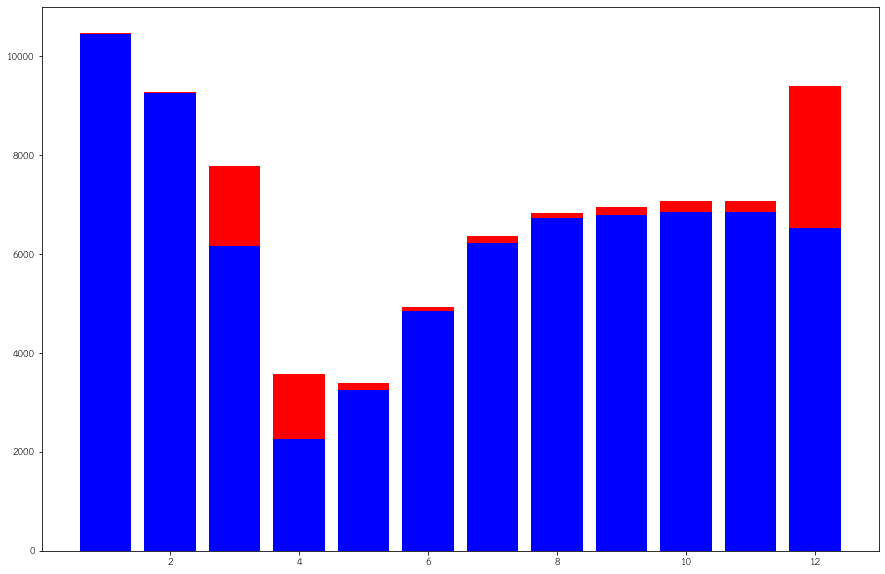

In [69]:
plt.bar(finall3['month'],finall3['Num_travel'],label = 'Num_travel',color = 'blue',)
plt.bar(finall3['month'],finall3['Num_patient'],label = 'Num_patient',color = 'red',bottom=finall3['Num_travel'])

###จากกราฟแท่ง พบว่าจำนวนผู้เดินทางยิงมากขึ้นจำนวนผู้ติดเชื้อจะน้อยลงแต่เมื่อมีการเดินทางน้อยลงจำนวนผู้ติดเชื้อจะมากขึ้น

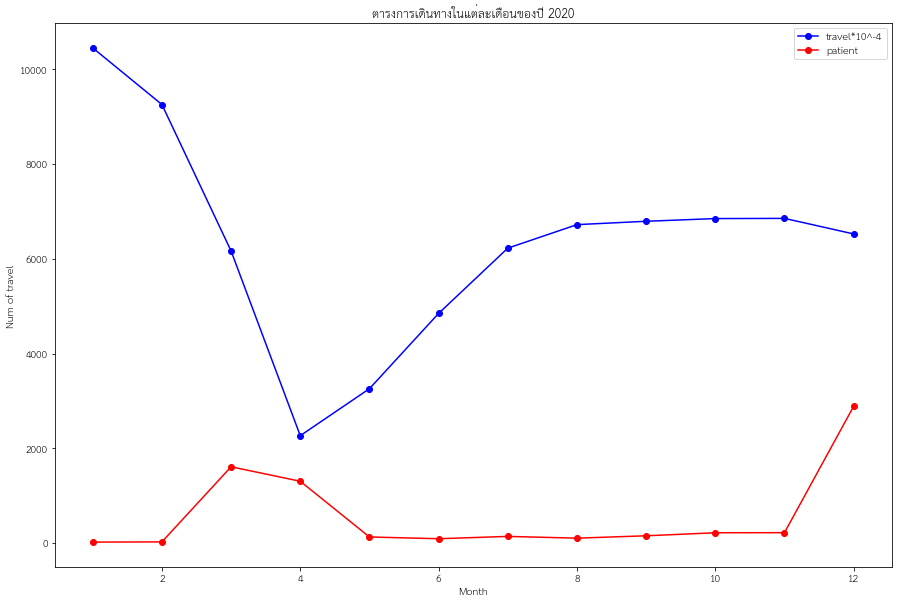

In [70]:
plt.plot(finall3['month'],finall3['Num_travel'],'o-b',label = 'travel*10^-4')
plt.plot(finall3['month'],finall3['Num_patient'],'o-r',label = 'patient')
plt.title('ตารงการเดินทางในแต่ละเดือนของปี 2020')
plt.xlabel('Month')
plt.ylabel('Num of travel')
plt.legend()

###จากกราฟ พบว่าจำนวนผู้เดินทางยิงมากขึ้นจำนวนผู้ติดเชื้อจะน้อยลงแต่เมื่อมีการเดินทางน้อยลงจำนวนผู้ติดเชื้อจะมากขึ้น แต่เมื่อพิจารณาแล้วจะพบว่าอาจจะเป็นเพราะในช่วงเดือนแรกที่มีการเดินทางมากทำให้ติดเชื้อในช่วงนั้นแล้วแต่ผลตรวจล่าช้าจึงทำให้จำนวนผ้ที่ติดเชื้อจริงๆคลาดเคลื่อน ซึ่งอาจจะเป็นจริงเมื่อพิจารณาในช่วงเดือนสุดท้ายที่มีจำนวนคนติดเชื้อเพิ่มขึ้นเนื่องจากช่วงกลางเดือนเริ่มมีผู้เดินทางเพิ่มขึ้นเรื่อยๆ

#2. เปรียบเทียบวิธีการเดินทางของคนเป็นรายเดือนเทียบกับจำนวนผู้ป่วยในเดือนนั้นๆ

#ตารางของผู้ติดเชื้อและจำนวนผู้เดินทางในปี 2021

In [71]:
new_data_covid_2021 = new_data_covid[new_data_covid['announce_date'] > datetime(year=2020,month=12,day=31)]

In [72]:
covid_2021_travel = pd.DataFrame(new_data_covid_2021.groupby('month')['Num_travel'].sum()).reset_index()

In [73]:
covid_2021 = pd.DataFrame(new_data_covid_2021.groupby('month')['Num_patient'].sum()).reset_index()

In [74]:
covid_2021_travel['Num_patient'] = covid_2021_travel['month'].map(covid_2021.set_index('month')['Num_patient'])

In [75]:
covid19_2021 = covid_2021_travel

In [76]:
covid19_2021['Num_travel'] = covid19_2021['Num_travel']/1000

In [77]:
covid19_2021

,month,Num_travel,Num_patient
0,1,41277.722,11898.0
1,2,46950.817,7169.0
2,3,61514.512,2912.0
3,4,35492.243,28647.0


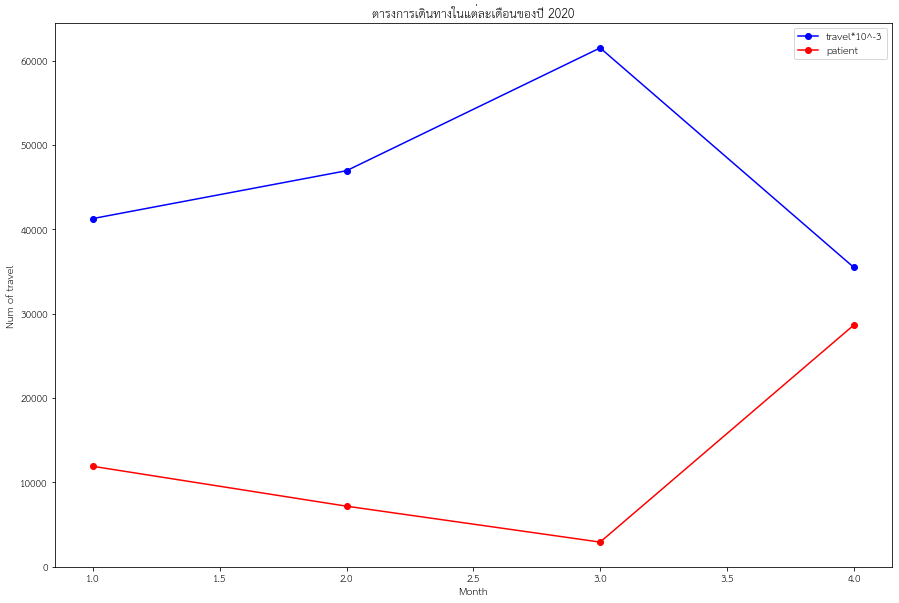

In [78]:
plt.plot(covid19_2021['month'],covid19_2021['Num_travel'],'o-b',label = 'travel*10^-3')
plt.plot(covid19_2021['month'],covid19_2021['Num_patient'],'o-r',label = 'patient')
plt.title('ตารงการเดินทางในแต่ละเดือนของปี 2020')
plt.xlabel('Month')
plt.ylabel('Num of travel')
plt.legend()

สรุปได้ในลักษณะเดียวกันกับกราฟในปี 2020

In [79]:
covid_thailand_19 = pd.read_excel(os.path.join(path,'passenger-covid19.xlsx'),sheet_name='2563-2564 รวมในประเทศ',skiprows=1,skipfooter=33)

In [80]:
covid_thailand_19.rename(columns={'Unnamed: 0':'pattern'},inplace=True)

In [81]:
covid_thailand_19

,pattern,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ทางถนน (คน),1483255,1705026,1752572,1576146,1565134,1746239,1730243,1721777,1698594,1727356,1522765,1511236,1683606,1691301,1727613,1676901,1732040,1556750,1511356,1718946,1710079,1678182,1685422,1658692,1523835,1498975,1696898,1679988,1668462,1640721,1704546,1400174,1483074,1706497,1731697,1727513,1662866,1746742,1505635,...,997062,1017447,849673,787616,937505,969454,958065,981683,1011976,877911,794001,974571,965117,967022,987469,1006485,868194,789312,965421,753176,908431,936938,929038,719618,555680,578184,424539,454352,479063,596596,540688,507339,695769,665925,648848,631892,635830,516751,425707,580580
1,ทางราง (คน),885353,1269207,1366412,1027281,915425,1479971,1496915,1496873,1525899,1630428,1192917,988051,1479502,1491002,1502596,1507477,1599647,1169227,983700,1495196,1497279,1488097,1497174,1527329,1116084,938763,1420125,1457240,1440515,1464619,1597290,1097787,940562,1452349,1437693,1463069,1465400,1589959,1036116,...,984873,1033094,690769,544737,961659,986118,994193,1007277,1083825,730040,583999,1002307,1008957,1039196,1037660,1109747,726174,537800,986006,586488,932517,830224,792450,430863,303809,396526,235614,227986,245450,421863,303925,260010,520387,488979,475030,467490,474554,289943,223384,418835
2,ทางน้ำ (คน),272578,291990,301260,271171,254176,281785,275127,253550,263139,280283,243767,246025,276490,276916,253897,252473,281743,251052,227983,293441,278167,267105,266393,281291,257999,246371,269399,270801,253640,257520,264406,220866,231707,264747,259426,262889,257261,268799,234187,...,85762,126155,81959,86020,90290,109277,78491,88408,88934,85300,79325,107145,95217,91676,84888,81193,115793,106230,100081,83620,116425,105530,118869,163296,169357,167760,182536,166326,150923,108396,103610,73357,77813,69035,66006,60186,54870,48885,42733,53591
3,ทางอากาศ* (คน),102678,104613,100575,100852,100784,98456,98722,96142,98749,101348,93156,99755,99229,98052,98970,103727,106000,103356,105954,105424,100735,101432,104623,103697,101563,103158,103498,98451,95555,95849,97556,90402,89533,88154,85779,88266,93860,99445,94944,...,51244,65243,57665,64944,59144,51341,53670,59380,67960,63406,72844,66721,56866,57980,70353,77529,76062,80447,73958,77376,74769,79717,75900,69100,59960,51998,47717,48945,49859,44204,43157,45917,29483,25390,18141,16139,15365,13702,16622,13585
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,2845067,

#แยกประเภทของการเดินทางออกเป็น 4 ประเภทคือ ทางบก ทางรถไฟ ทางน้ำ และทางอากาศ

In [82]:
covid_thailand_19_new = covid_thailand_19[['pattern']]

ตารางจำนวนผู้เดินทางทางบก

In [83]:
c1 = covid_thailand_19.iloc[0,:]
road = pd.DataFrame(c1).reset_index()
road.rename(columns={'index':'datetime',0:'Road'},inplace=True)
road.drop(index=0)

,datetime,Road
1,2020-01-01 00:00:00,1483255
2,2020-01-02 00:00:00,1705026
3,2020-01-03 00:00:00,1752572
4,2020-01-04 00:00:00,1576146
5,2020-01-05 00:00:00,1565134
...,...,...
478,2021-04-22 00:00:00,631892
479,2021-04-23 00:00:00,635830
480,2021-04-24 00:00:00,516751
481,2021-04-25 00:00:00,425707


ตารางจำนวนผู้เดินทางทางรถไฟ

In [84]:
c2 = covid_thailand_19.iloc[1,:]
subway = pd.DataFrame(c2).reset_index()
subway.rename(columns={'index':'datetime',1:'subway'},inplace=True)
subway.drop(index=0)

,datetime,subway
1,2020-01-01 00:00:00,885353
2,2020-01-02 00:00:00,1269207
3,2020-01-03 00:00:00,1366412
4,2020-01-04 00:00:00,1027281
5,2020-01-05 00:00:00,915425
...,...,...
478,2021-04-22 00:00:00,467490
479,2021-04-23 00:00:00,474554
480,2021-04-24 00:00:00,289943
481,2021-04-25 00:00:00,223384


ตารางจำนวนผู้เดินทางทางน้ำ

In [85]:
c3 = covid_thailand_19.iloc[2,:]
river = pd.DataFrame(c3).reset_index()
river.rename(columns={'index':'datetime',2:'river'},inplace=True)
river.drop(index=0)

,datetime,river
1,2020-01-01 00:00:00,272578
2,2020-01-02 00:00:00,291990
3,2020-01-03 00:00:00,301260
4,2020-01-04 00:00:00,271171
5,2020-01-05 00:00:00,254176
...,...,...
478,2021-04-22 00:00:00,60186
479,2021-04-23 00:00:00,54870
480,2021-04-24 00:00:00,48885
481,2021-04-25 00:00:00,42733


ตารางจำนวนผู้เดินทางทางอากาศ

In [86]:
c4 = covid_thailand_19.iloc[3,:]
Air = pd.DataFrame(c4).reset_index()
Air.rename(columns={'index':'datetime',3:'Air'},inplace=True)
Air.drop(index=0)

,datetime,Air
1,2020-01-01 00:00:00,102678
2,2020-01-02 00:00:00,104613
3,2020-01-03 00:00:00,100575
4,2020-01-04 00:00:00,100852
5,2020-01-05 00:00:00,100784
...,...,...
478,2021-04-22 00:00:00,16139
479,2021-04-23 00:00:00,15365
480,2021-04-24 00:00:00,13702
481,2021-04-25 00:00:00,16622


#ทำการรวมตารางทั้งหมดเข้าด้วยกันเพื่อ plotกราฟ

In [87]:
road['subway'] = subway['subway']
road['river'] = river['river']
road['Air'] = Air['Air']
All_way = road

In [88]:
All_way.drop(index=0,inplace=True)

In [89]:
All_way['datetime'] = pd.to_datetime(All_way['datetime'],format='%d/%m/%Y')

In [90]:
All_way['Month'] = All_way['datetime'].dt.month

In [91]:
All_way_2020 = All_way[All_way['datetime'] <= datetime(year=2020,month=12,day=31)]

In [92]:
All_way_2020

,datetime,Road,subway,river,Air,Month
1,2020-01-01,1483255,885353,272578,102678,1
2,2020-01-02,1705026,1269207,291990,104613,1
3,2020-01-03,1752572,1366412,301260,100575,1
4,2020-01-04,1576146,1027281,271171,100852,1
5,2020-01-05,1565134,915425,254176,100784,1
...,...,...,...,...,...,...
362,2020-12-27,721787,430007,82000,72229,12
363,2020-12-28,898734,743230,100460,65946,12
364,2020-12-29,908717,703492,133500,66373,12
365,2020-12-30,890296,651791,147568,70591,12


In [93]:
All_way_2020.groupby('Month')['river'].sum()

Month
1     8261938
2     6998927
3     2526613
4     1155419
5     1503935
6     2241446
7     3481589
8     3176923
9     3344351
10    3012379
11    3402311
12    3690246
Name: river, dtype: int64

In [94]:
all_graph = pd.DataFrame(All_way_2020.groupby('Month')['Road'].sum()).reset_index()

In [95]:
all_subway = pd.DataFrame(All_way_2020.groupby('Month')['subway'].sum()).reset_index()

In [96]:
all_subway

,Month,subway
0,1,41947594
1,2,36460619
2,3,24466973
3,4,7368716
4,5,11482880
5,6,19881012
6,7,25890919
7,8,29055512
8,9,30044159
9,10,30259559


In [97]:
all_river = pd.DataFrame(All_way_2020.groupby('Month')['river'].sum()).reset_index()

In [98]:
all_river

,Month,river
0,1,8261938
1,2,6998927
2,3,2526613
3,4,1155419
4,5,1503935
5,6,2241446
6,7,3481589
7,8,3176923
8,9,3344351
9,10,3012379


In [99]:
all_Air = pd.DataFrame(All_way_2020.groupby('Month')['Air'].sum()).reset_index()

In [100]:
all_graph['travel_subway'] = all_subway['subway']
all_graph['travel_river'] = all_river['river']
all_graph['travel_Air'] = all_Air['Air']

In [101]:
all_graph['patient'] = finall3['Num_patient']

In [102]:
all_graph.rename(columns={'Road':'travel_Road'},inplace=True)

In [103]:
all_graph['travel_subway'] = all_graph['travel_subway']
all_graph['travel_river'] = all_graph['travel_river']
all_graph['travel_Air'] = all_graph['travel_Air']
all_graph['travel_Road'] = all_graph['travel_Road']

#ตารางนี้เกิดจากการรวมทุกรูปแบบการเดินทางและรวมจำนวนผู้ป่วยเข้าด้วยกันเพื่อสร้างกราฟเปรียบเทียบในปี 2020

In [104]:
all_graph

,Month,travel_Road,travel_subway,travel_river,travel_Air,patient
0,1,51184656,41947594,8261938,3122659,19.0
1,2,46429218,36460619,6998927,2675542,23.0
2,3,32946721,24466973,2526613,1695583,1609.0
3,4,14071816,7368716,1155419,57439,1303.0
4,5,19371815,11482880,1503935,211125,127.0
5,6,25723627,19881012,2241446,618881,90.0
6,7,31550369,25890919,3481589,1318559,139.0
7,8,33311862,29055512,3176923,1664163,102.0
8,9,32661894,30044159,3344351,1866183,152.0
9,10,33084230,30259559,3012379,2131684,216.0


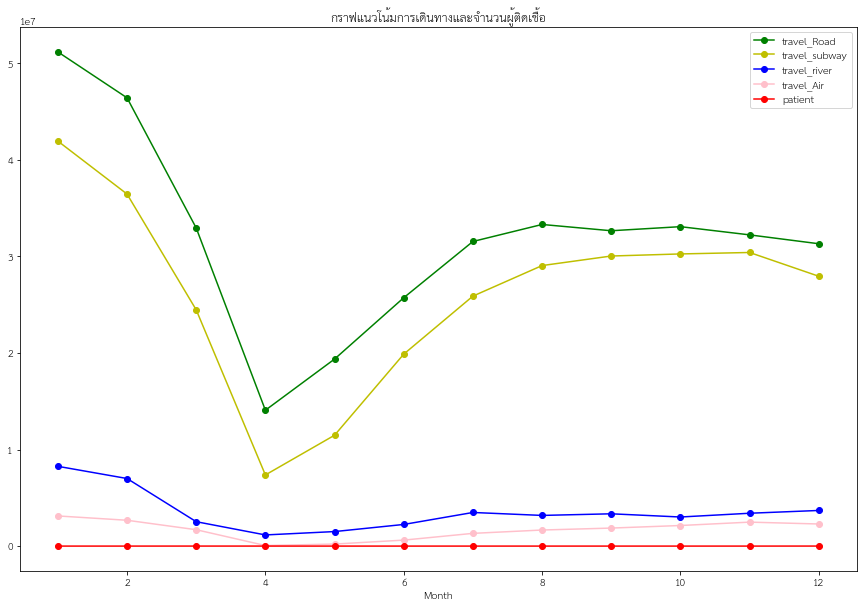

In [105]:
plt.plot(all_graph['Month'],all_graph['travel_Road'],'o-',color='green',label = 'travel_Road')
plt.plot(all_graph['Month'],all_graph['travel_subway'],'o-y',label = 'travel_subway')
plt.plot(all_graph['Month'],all_graph['travel_river'],'o-b',label = 'travel_river')
plt.plot(all_graph['Month'],all_graph['travel_Air'],'o-',color='pink',label = 'travel_Air')
plt.plot(all_graph['Month'],all_graph['patient'],'o-r',label = 'patient')
plt.title('กราฟแนวโน้มการเดินทางและจำนวนผู้ติดเชื้อ')
plt.xlabel('Month')
plt.legend()


จากตารางพบว่าในปี 2020 มีการเดินทางทางบกมากที่สุด รองลงมาคือทางรถไฟ ทางน้ำ และทางอากาศ โดยจำนวนผู้ติดเชื้อมีการเพิ่มขึ้นเมื่อมีจำนวนการเดินทางลดลงซึ่งอาจจะพิจารณาได้ตามข้อที่ 1. อาจจะบอกได้ว่าผู้ติดเชื้อส่วนใหญ่นั้นติดเชื้อจาการเดิทางทางบกเป็นส่วนใหญ่

#ตารางนี้เกิดจากการรวมทุกรูปแบบการเดินทางและรวมจำนวนผู้ป่วยเข้าด้วยกันเพื่อสร้างกราฟเปรียบเทียบในปี 2021

In [106]:
All_way_2021 = All_way[All_way['datetime'] > datetime(year=2020,month=12,day=31)]

In [107]:
all_graph_2021 = pd.DataFrame(All_way_2021.groupby('Month')['Road'].sum()).reset_index()

In [108]:
all_subway_2021 = pd.DataFrame(All_way_2021.groupby('Month')['subway'].sum()).reset_index()

In [109]:
all_river_2021 = pd.DataFrame(All_way_2021.groupby('Month')['river'].sum()).reset_index()

In [110]:
all_Air_2021 = pd.DataFrame(All_way_2021.groupby('Month')['Air'].sum()).reset_index()

In [111]:
all_graph_2021['travel_subway'] = all_subway_2021['subway']/100
all_graph_2021['travel_river'] = all_river_2021['river']/100
all_graph_2021['travel_Air'] = all_Air_2021['Air']/100
all_graph_2021['Road'] = all_graph_2021['Road']/100

In [112]:
all_graph_2021['patient'] = covid19_2021['Num_patient']

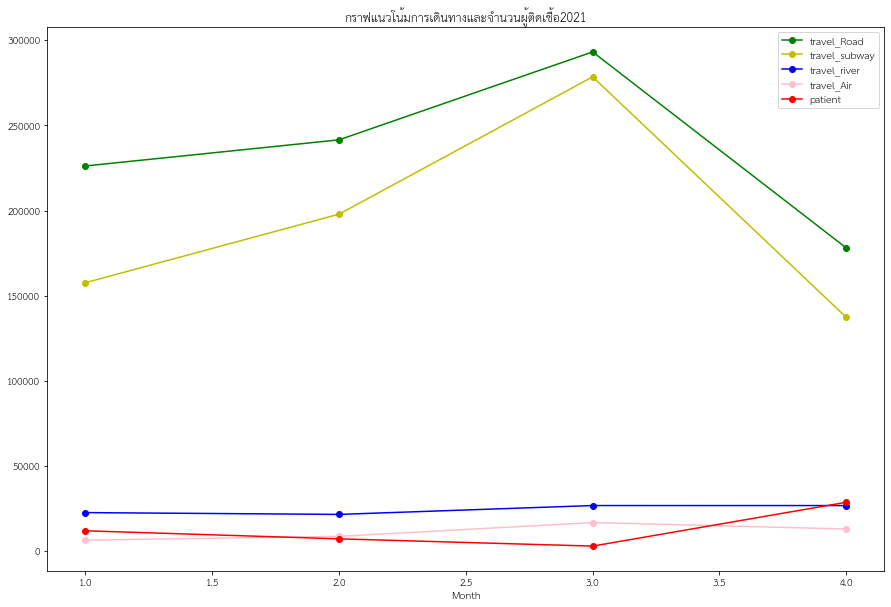

In [113]:
plt.plot(all_graph_2021['Month'],all_graph_2021['Road'],'o-',color='green',label = 'travel_Road')
plt.plot(all_graph_2021['Month'],all_graph_2021['travel_subway'],'o-y',label = 'travel_subway')
plt.plot(all_graph_2021['Month'],all_graph_2021['travel_river'],'o-b',label = 'travel_river')
plt.plot(all_graph_2021['Month'],all_graph_2021['travel_Air'],'o-',color='pink',label = 'travel_Air')
plt.plot(all_graph_2021['Month'],all_graph_2021['patient'],'o-r',label = 'patient')
plt.title('กราฟแนวโน้มการเดินทางและจำนวนผู้ติดเชื้อ2021')
plt.xlabel('Month')
plt.legend()

In [114]:
 all_province_table.isnull().any()

No.                      False
announce_date            False
Notified date             True
sex                       True
age                       True
Unit                      True
nationality               True
province_of_isolation     True
risk                      True
province_of_onset        False
district_of_onset         True
dtype: bool

#3. เปรียบเทียบ จำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของจังหวัด top 10 ของ 6 เดือนล่าสุด

#การดึงข้อมูลของ6เดือนล่าสุด ตั้งแต่วันที่ 1 พ.ย. 2020 - 26 เม.ย 2021

In [115]:
six_date = all_province_table[all_province_table['announce_date'] >= datetime(year=2020,month=11,day=1)].sort_values(by = 'announce_date')

In [116]:
table_six_date = pd.DataFrame(six_date.groupby('province_of_onset')['No.'].count().sort_values(ascending=False)).reset_index()

In [117]:
table_six_date.rename(columns={'No.':'Number_patient'},inplace=True)

##ทำการดึงจังหวัดที่มีจำนวนผู้ติดเชื้อมากที่สุด 10 จังหวัด

In [118]:
top10 = table_six_date.iloc[:10,:]
top10['province_of_onset'] = top10['province_of_onset'].rename(index = {'สมุทรสาคร':'samudsakorn','กรุงเทพมหานคร':'bangkok','เชียงใหม่':'chaimai','ชลบุรี':'chon','ปทุมธานี':'patom','สมุทรปราการ':'samudpakan','นนทบุรี':'non','ระยอง':'rayong','ประจวบคีรีขันธ์':'pajaob','นครปฐม':'nakorn'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [119]:
top10

,province_of_onset,Number_patient
0,สมุทรสาคร,17547
1,กรุงเทพมหานคร,12780
2,เชียงใหม่,3244
3,ชลบุรี,3138
4,ปทุมธานี,1480
5,สมุทรปราการ,1302
6,นนทบุรี,1026
7,ระยอง,1022
8,ประจวบคีรีขันธ์,991
9,นครปฐม,647


In [120]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [121]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [122]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,10]

###plot bar chart เพื่อเปรียบเทียบจำนวนผู้ติดเชื้อใน10จังหวัดที่มีผู้ติดเชื้อมากที่สุด 6เดือนล่าสุด

<BarContainer object of 10 artists>

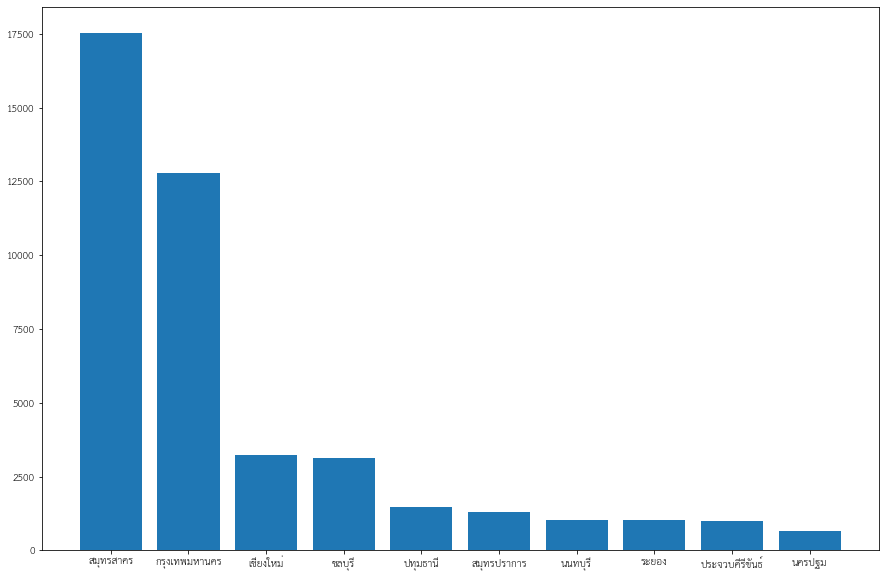

In [123]:
plt.bar(top10['province_of_onset'],top10['Number_patient'])

จากตาราง พบว่าจังหวัดที่มีผู้ติดเชื้อมากที่10 6เดือนย้อนหลังคือ สมุทราสาคร กรุงเทพมหานคร เชียงใหม่ ชลบุรี ปทุมธานี สมุทรปราการ นนทบุรี ระยอง ประจวบคีรีขันธ์ และนครปฐม ตามลำดับ

#4. เปรียบเทียบจำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของแต่ละภูมิภาค (5 ภูมิภาค (การท่องเที่ยว)) ตามข้อมูลใน

###วนลูปเพื่อเติมภูมิภาคให้ตรงตามที่ตั้งของจังหวัดนั้นๆ

In [124]:
data = []
for i in range(0,57510):
    if all_province_table['province_of_onset'][i] == 'กรุงเทพมหานคร'or all_province_table['province_of_onset'][i] =='นนทบุรี'or all_province_table['province_of_onset'][i] =='ปทุมธานี'or all_province_table['province_of_onset'][i] =='สมุทรปราการ':
        region = 'กรุงเทพมหานครและปริมณฑล'
    elif all_province_table['province_of_onset'][i] == 'สิงห์บุรี'or all_province_table['province_of_onset'][i] == 'อ่างทอง'or all_province_table['province_of_onset'][i] == 'พระนครศรีอยุธยา'or all_province_table['province_of_onset'][i] == 'ลพบุรี'or all_province_table['province_of_onset'][i] == 'สระบุรี'or all_province_table['province_of_onset'][i] == 'นครนายก'or all_province_table['province_of_onset'][i] == 'ปราจีนบุรี'or all_province_table['province_of_onset'][i] == 'สระแก้ว'or all_province_table['province_of_onset'][i] == 'ฉะเชิงเทรา'or all_province_table['province_of_onset'][i] == 'ชลบุรี'or all_province_table['province_of_onset'][i] == 'ระยอง'or all_province_table['province_of_onset'][i] == 'จันทบุรี'or all_province_table['province_of_onset'][i] == 'ตราด'or all_province_table['province_of_onset'][i] == 'สมุทรสาคร'or all_province_table['province_of_onset'][i] == 'สมุทรสาคร'or all_province_table['province_of_onset'][i] == 'นครปฐม'or all_province_table['province_of_onset'][i] == 'สุพรรณบุรี'or all_province_table['province_of_onset'][i] == 'กาญจนบุรี'or all_province_table['province_of_onset'][i] == 'ราชบุรี'or all_province_table['province_of_onset'][i] == 'เพชรบุรี'or all_province_table['province_of_onset'][i] == 'ประจวบคีรีขันธ์':
        region = 'ภาคกลาง'
    elif all_province_table['province_of_onset'][i] == 'อุดรธานี'or all_province_table['province_of_onset'][i] == 'หนองบัวลำภู'or all_province_table['province_of_onset'][i] == 'หนองคาย'or all_province_table['province_of_onset'][i] == 'บึงกาฬ'or all_province_table['province_of_onset'][i] == 'สกลนคร'or all_province_table['province_of_onset'][i] == 'นครพนม'or all_province_table['province_of_onset'][i] == 'มุกดาหาร'or all_province_table['province_of_onset'][i] == 'ขอนแก่น'or all_province_table['province_of_onset'][i] == 'มหาสารคาม'or all_province_table['province_of_onset'][i] == 'ร้อยเอ็ด'or all_province_table['province_of_onset'][i] == 'กาฬสินธุ์'or all_province_table['province_of_onset'][i] == 'นครราชสีมา'or all_province_table['province_of_onset'][i] == 'ชัยภูมิ'or all_province_table['province_of_onset'][i] == 'บุรีรัมย์'or all_province_table['province_of_onset'][i] == 'สุรินทร์'or all_province_table['province_of_onset'][i] == 'ศรีสะเกษ'or all_province_table['province_of_onset'][i] == 'อุบลราชธานี'or all_province_table['province_of_onset'][i] == 'ยโสธร'or all_province_table['province_of_onset'][i] == 'อำนาจเจริญ':
        region = 'ภาคตะวันออกเฉียงเหนือ'
    elif all_province_table['province_of_onset'][i] == 'พิษณุโลก'or all_province_table['province_of_onset'][i] == 'สุโขทัย'or all_province_table['province_of_onset'][i] == 'ตาก'or all_province_table['province_of_onset'][i] == 'กำแพงเพชร'or all_province_table['province_of_onset'][i] == 'นครสวรรค์'or all_province_table['province_of_onset'][i] == 'พิจิตร'or all_province_table['province_of_onset'][i] == 'เพชรบูรณ์'or all_province_table['province_of_onset'][i] == 'อุทัยธานี'or all_province_table['province_of_onset'][i] == 'ชัยนาท'or all_province_table['province_of_onset'][i] == 'เชียงใหม่'or all_province_table['province_of_onset'][i] == 'เชียงราย'or all_province_table['province_of_onset'][i] == 'ลำพูน'or all_province_table['province_of_onset'][i] == 'แม่ฮ่องสอน'or all_province_table['province_of_onset'][i] == 'ลำปาง'or all_province_table['province_of_onset'][i] == 'แพร่ 'or all_province_table['province_of_onset'][i] == 'น่าน'or all_province_table['province_of_onset'][i] == 'พะเยา' or all_province_table['province_of_onset'][i] == 'อุตรดิตถ์':
        region = 'ภาคเหนือ'
    elif all_province_table['province_of_onset'][i] == 'นราธิวาส'or all_province_table['province_of_onset'][i] == 'ปัตตานี'or all_province_table['province_of_onset'][i] == 'ยะลา'or all_province_table['province_of_onset'][i] == 'สงขลา'or all_province_table['province_of_onset'][i] == 'พัทลุง'or all_province_table['province_of_onset'][i] == 'สตูล'or all_province_table['province_of_onset'][i] == 'นครศรีธรรมราช'or all_province_table['province_of_onset'][i] == 'ตรัง'or all_province_table['province_of_onset'][i] == 'กระบี่'or all_province_table['province_of_onset'][i] == 'ภูเก็ต'or all_province_table['province_of_onset'][i] == 'พังงา'or all_province_table['province_of_onset'][i] == 'สุราษฎร์ธานี'or all_province_table['province_of_onset'][i] == 'ชุมพร'or all_province_table['province_of_onset'][i] == 'ระนอง':
        region = 'ภาคใต้'
    else :
        region = 'Unknow'
    data.append(region)

In [125]:
all_province_table['region'] = data

In [126]:
all_province_table

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,region
0,1,2020-01-12,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานครและปริมณฑล
1,2,2020-01-17,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานครและปริมณฑล
2,3,2020-01-22,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,ภาคกลาง
3,4,2020-01-22,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานครและปริมณฑล
4,5,2020-01-24,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานครและปริมณฑล
...,...,...,...,...,...,...,...,...,...,...,...,...
57505,57506,2021-04-26,25/4/2021,ชาย,51.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,NaN,กรุงเทพมหานครและปริมณฑล
57506,57507,2021-04-26,25/4/2021,ชาย,50.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,NaN,กรุงเทพมหานครและปริมณฑล
57507,57508,2021-04-26,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,NaN,กรุงเทพมหานครและปริมณฑล
57508,57509,2021-04-26,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,NaN,กรุงเทพมหานครและปริมณฑล


#สร้างตารางที่ groupby จำนวนผู้ติดเชื้อโดย groupby ตามภูมิภาค

In [127]:
region_prepair = pd.DataFrame(all_province_table.groupby('region')['No.'].count().sort_values(ascending=False)).reset_index()

In [128]:
region_prepair.rename(columns={'No.':'number_patient'},inplace=True)

<BarContainer object of 6 artists>

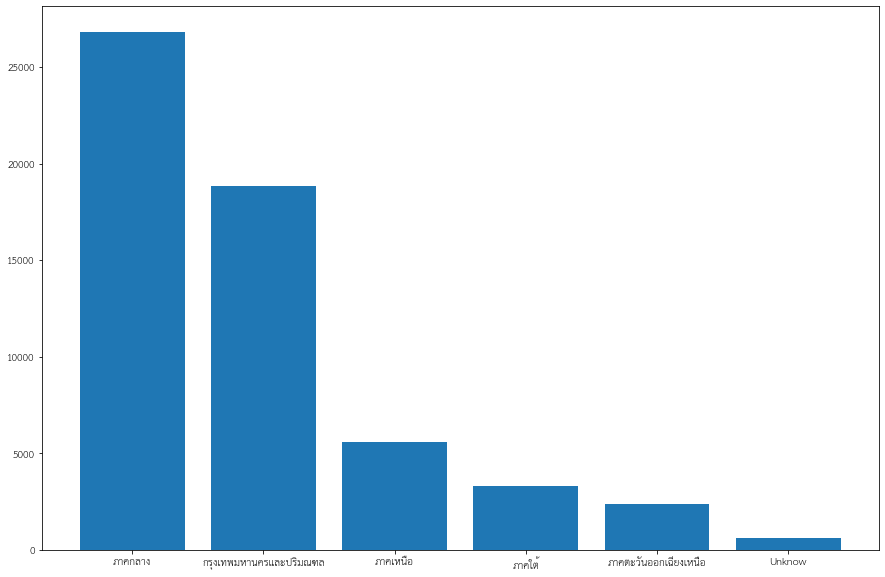

In [129]:
plt.bar(region_prepair['region'],region_prepair['number_patient'])

จากกราฟ พบว่าภาคกลางมีจำนวนผู้ติดเชื้อมากที่สุด รองลงมาคือกรุงเทพและปริมณฑล ภาคเหนือ ภาคใต้ ภาคตะวันออกเฉียงเหนือ ส่วนของมูล unknow คือไม่สามารถระบุภูมิภาคได้

In [130]:
All_way_2020.to_excel('/content/drive/My Drive/DVZ/date_travel.xlsx')

In [131]:
all_province_table.to_excel('/content/drive/My Drive/DVZ/date_pateint.xlsx')

In [132]:
new_data_covid.to_excel('/content/drive/My Drive/DVZ/date_covid_new.xlsx')

In [133]:
new_data_covid

,announce_date,Num_travel,Num_patient,month
1,2020-01-01,2743864,NaN,1
2,2020-01-02,3370836,NaN,1
3,2020-01-03,3520819,NaN,1
4,2020-01-04,2975450,NaN,1
5,2020-01-05,2835519,NaN,1
...,...,...,...,...
478,2021-04-22,1175707,1470.0,4
479,2021-04-23,1180619,2070.0,4
480,2021-04-24,869281,2839.0,4
481,2021-04-25,708446,2438.0,4
